In [17]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.add("Latexify")
# Pkg.resolve()

  Activating project at `c:\Users\Arnau\Documents\HORS_JEUX\stage\2025_Internship_SWG_Pomme\AR`
   Resolving package versions...
  No Changes to `C:\Users\Arnau\Documents\HORS_JEUX\stage\2025_Internship_SWG_Pomme\AR\Project.toml`
  No Changes to `C:\Users\Arnau\Documents\HORS_JEUX\stage\2025_Internship_SWG_Pomme\AR\Manifest.toml`


In [5]:
include(raw"utils\Structure.jl")
cd(@__DIR__)

Making a calendar of 100 years

In [4]:
k=100
Date_vec=collect(Date(1900):Day(1):Date(1900+k-1,12,31))
N=length(Date_vec)

36524

# AR model on each month

Parameters for each month

To find convenient parameters, below I have made an empirical map of where the parameters make the AR(2) series stationnary (in blue) and where they don't (in red)

In [5]:
# fig=Figure()
# ax=Axis(fig[1,1])
# ax.yticks=-2:0.2:2
# Φ₁ls=-3:.05:3
# Φ₂ls=-3:.05:3
# condition(r) = (imag(r) == 0) && (abs(r) > 1)
# for Φ₁ in Φ₁ls
#     for Φ₂ in Φ₂ls
#         color = all(condition.(RootAR([Φ₁,Φ₂]))) ? "blue" : "red" 
#         scatter!(ax, Φ₁,Φ₂, color=color)
#         ax.ylabel="Φ₂"
#         ax.xlabel="Φ₁"
#     end
# end
# fig

In [ ]:
RootsPolycarac(x,y)=roots(Polynomial([-1, x, y]))
using Latexify
Φ_month = stack([[5, 2], [-7, 1], [1, 8], [6, 2], [-2, 7], [0.5, 9], [-3, 2], [5, 4], [3, 1], [-4, 3], [3, 1], [5, 2]] / 10, dims=1)
Φ1_month, Φ2_month = Φ_month[:, 1], Φ_month[:, 2]
Rootsmat = stack(RootsPolycarac.(Φ1_month,Φ2_month))
σ_month = [1.5, 2, 4.5, 7, 8, 3, 4.5, 1, 7, 2.5, 3, 6]

Mat=round.([transpose(Φ_month) ; transpose(σ_month) ; Rootsmat],digits=2)
latexify(Mat; env = :table, booktabs = true, latex = false) |> print

\begin{tabular}{cccccccccccc}
\toprule
0.5 & -0.7 & 0.1 & 0.6 & -0.2 & 0.05 & -0.3 & 0.5 & 0.3 & -0.4 & 0.3 & 0.5\\
0.2 & 0.1 & 0.8 & 0.2 & 0.7 & 0.9 & 0.2 & 0.4 & 0.1 & 0.3 & 0.1 & 0.2\\
1.5 & 2.0 & 4.5 & 7.0 & 8.0 & 3.0 & 4.5 & 1.0 & 7.0 & 2.5 & 3.0 & 6.0\\
-3.81 & -1.22 & -1.18 & -4.19 & -1.06 & -1.08 & -1.61 & -2.33 & -5.0 & -1.28 & -5.0 & -3.81\\
1.31 & 8.22 & 1.06 & 1.19 & 1.35 & 1.03 & 3.11 & 1.08 & 2.0 & 2.61 & 2.0 & 1.31\\
\bottomrule
\end{tabular}


In [9]:
Φ_month

12×2 Matrix{Float64}:
  0.5   0.2
 -0.7   0.1
  0.1   0.8
  0.6   0.2
 -0.2   0.7
  0.05  0.9
 -0.3   0.2
  0.5   0.4
  0.3   0.1
 -0.4   0.3
  0.3   0.1
  0.5   0.2

Generation of the series associated

In [7]:
x=SimulateScenarios([7.,4.],Date_vec,Φ_month,σ_month)[1]
Monthly_temp=MonthlySeparateX(x,Date_vec)

12-element Vector{Vector{AbstractVector}}:
 [[7.0, 4.0, 2.2862623798216024, -1.4526239447469844, -1.2853661865366826, -1.195770364239291, -0.5208479981854319, -0.3046322534043976, -2.2127481415972454, -2.2583869906271477  …  3.9714087503188216, 1.4157014348348842, 2.625256056561335, 0.697561242553584, 0.10888856909500844, -0.7297112177136508, -1.6718595700463095, -0.6144672227854848, 0.28209351344453326, -0.3657948483587182], [-11.924419058533532, -11.545631701886421, -9.68203431595489, -8.876885160511902, -5.296405441383046, -3.2431920090593565, -4.344125014839493, -4.773046650162419, -3.5306503492430563, -0.9429147917028455  …  -3.914179666171618, -2.7486940485391154, -2.6985466987314486, -1.6285394984243793, -1.010787655904886, 0.4752397768988821, -0.14638034929970228, 0.10224718293264266, -1.5723840953865817, -1.1108213290988163], [-10.457652572278722, -7.166428609715748, -5.139822541517203, -3.65762261903453, -4.0312430788446685, -3.471165728573392, -1.9647650736074291, -1.4758912

## Autocorrelations

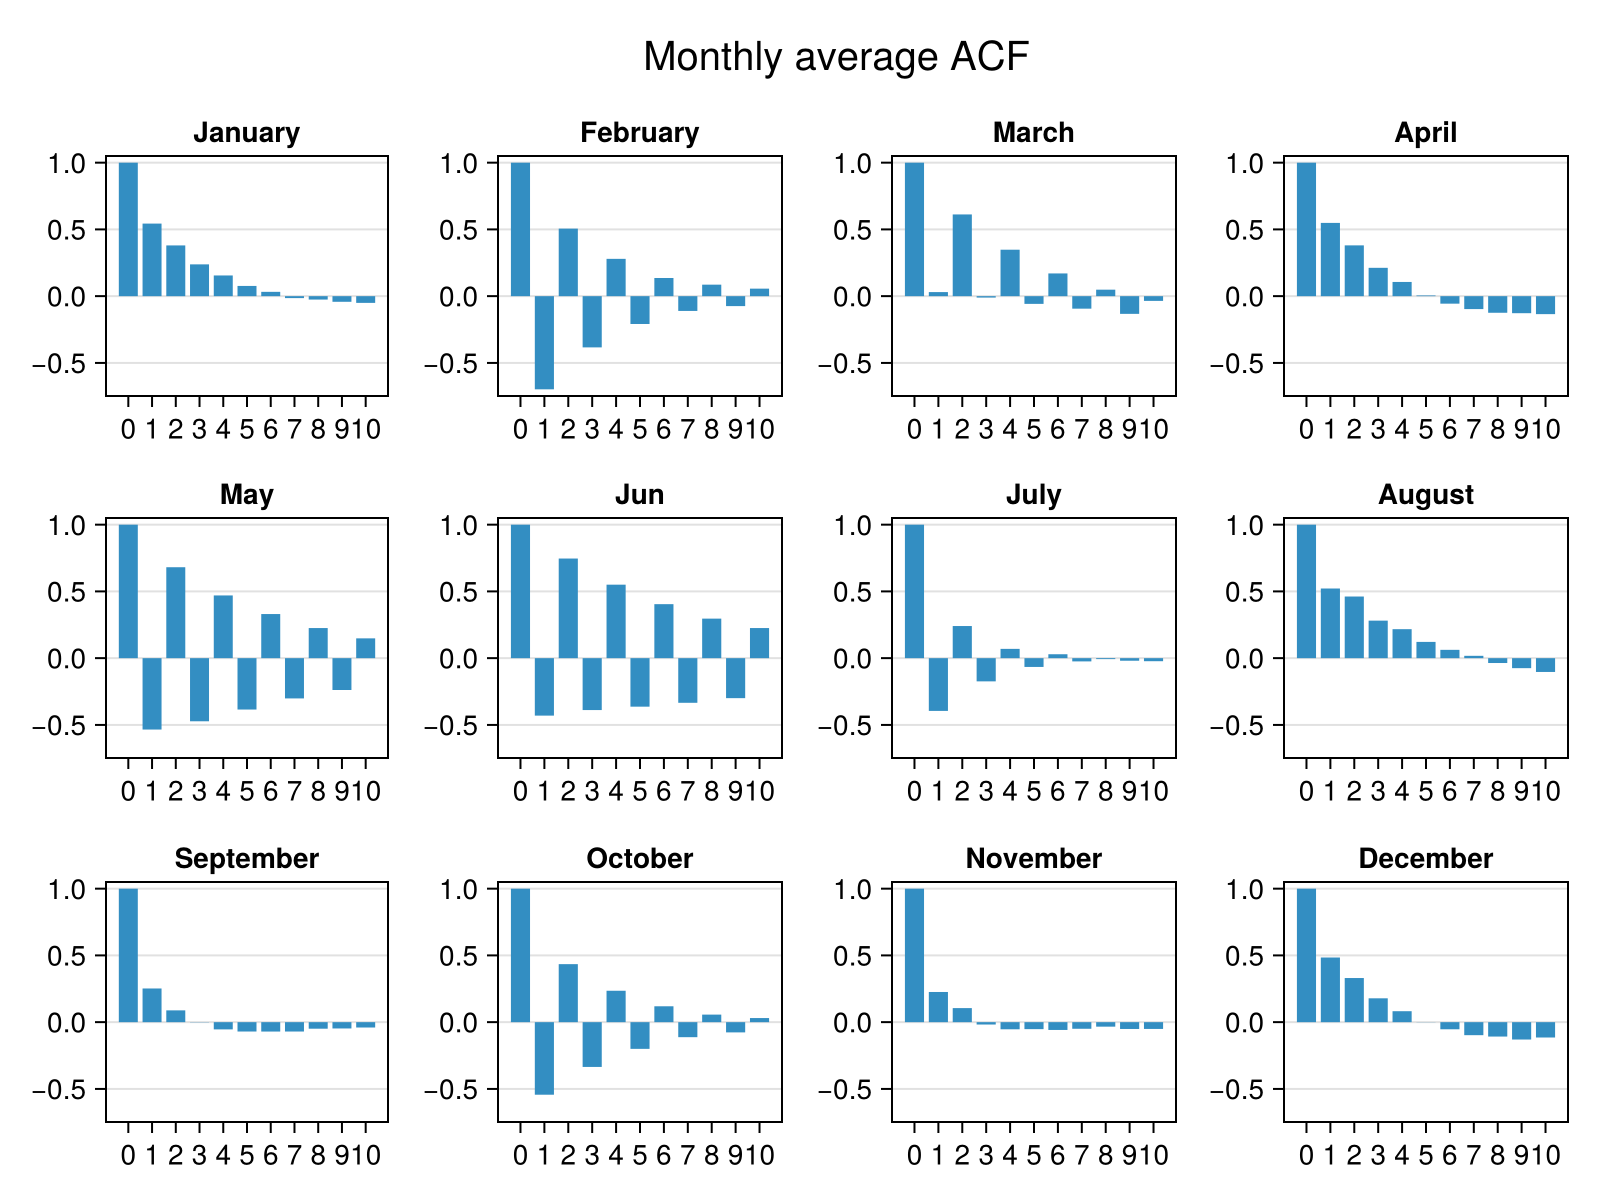

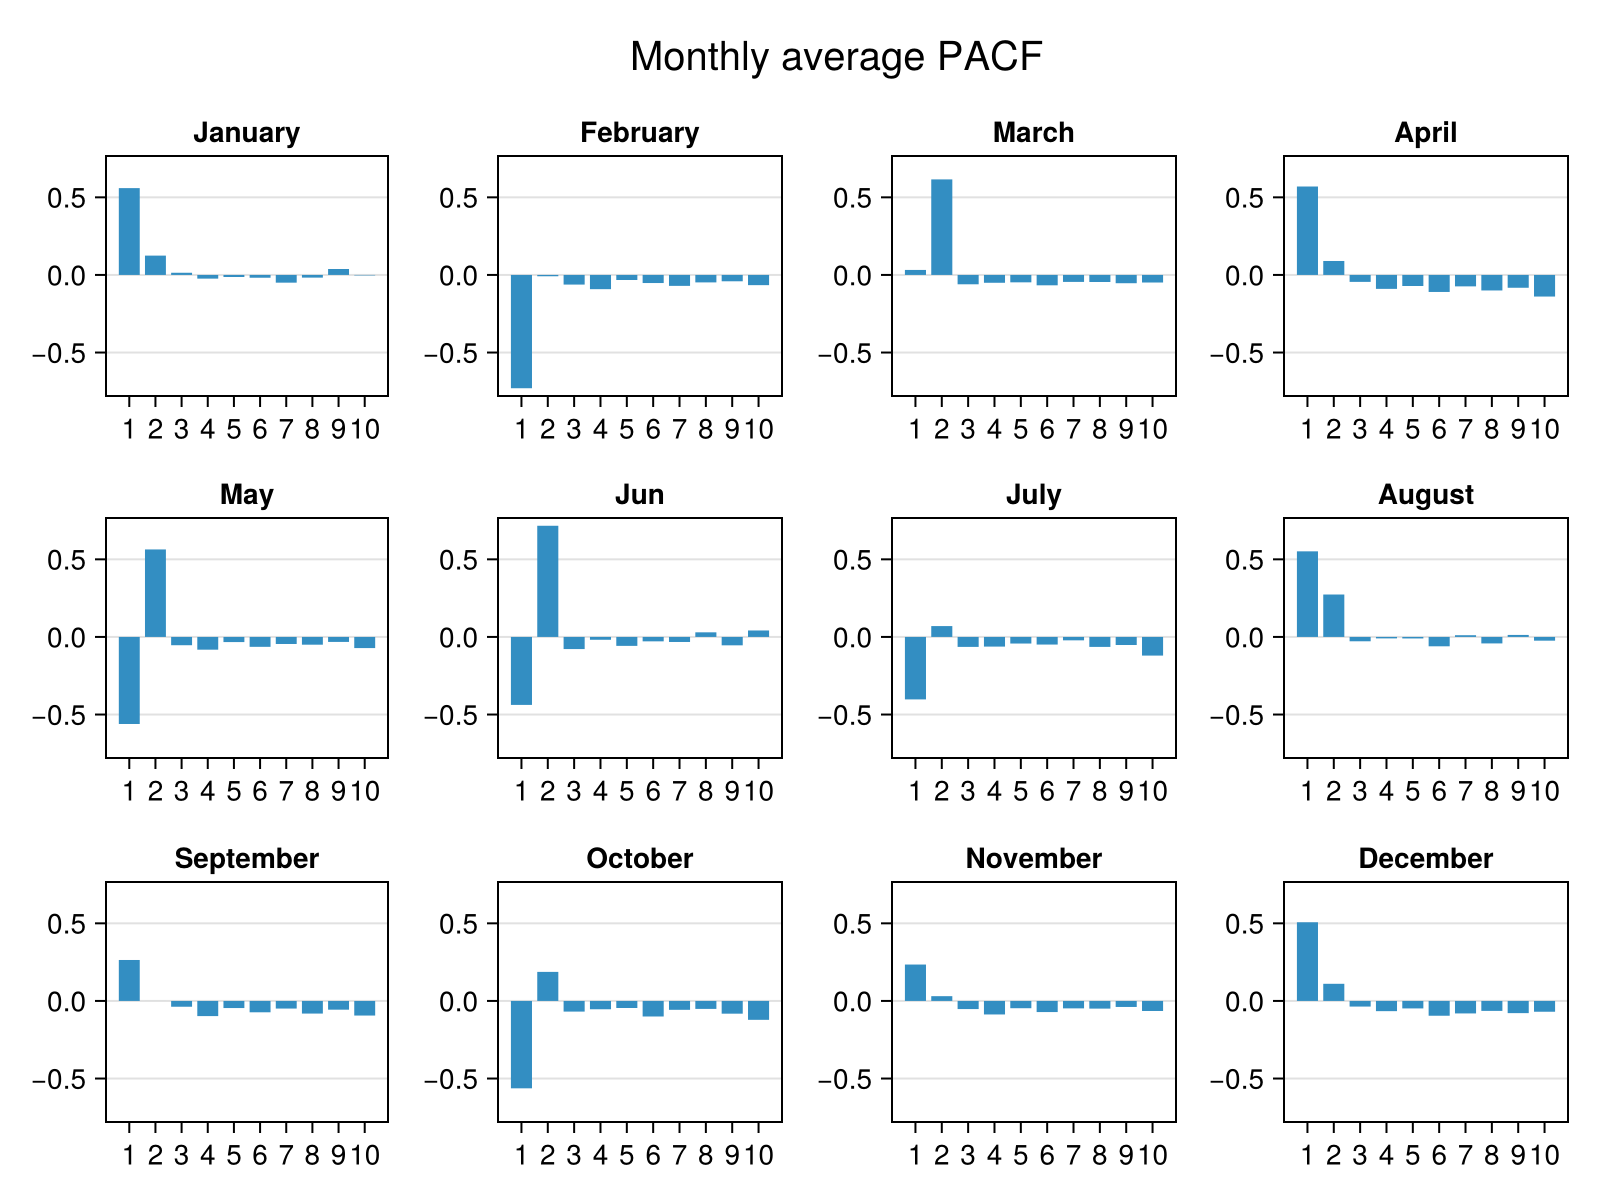

CairoMakie.Screen{IMAGE}


In [8]:
display(MonthlyACF(Monthly_temp))
display(MonthlyPACF(Monthly_temp))

## Estimating models

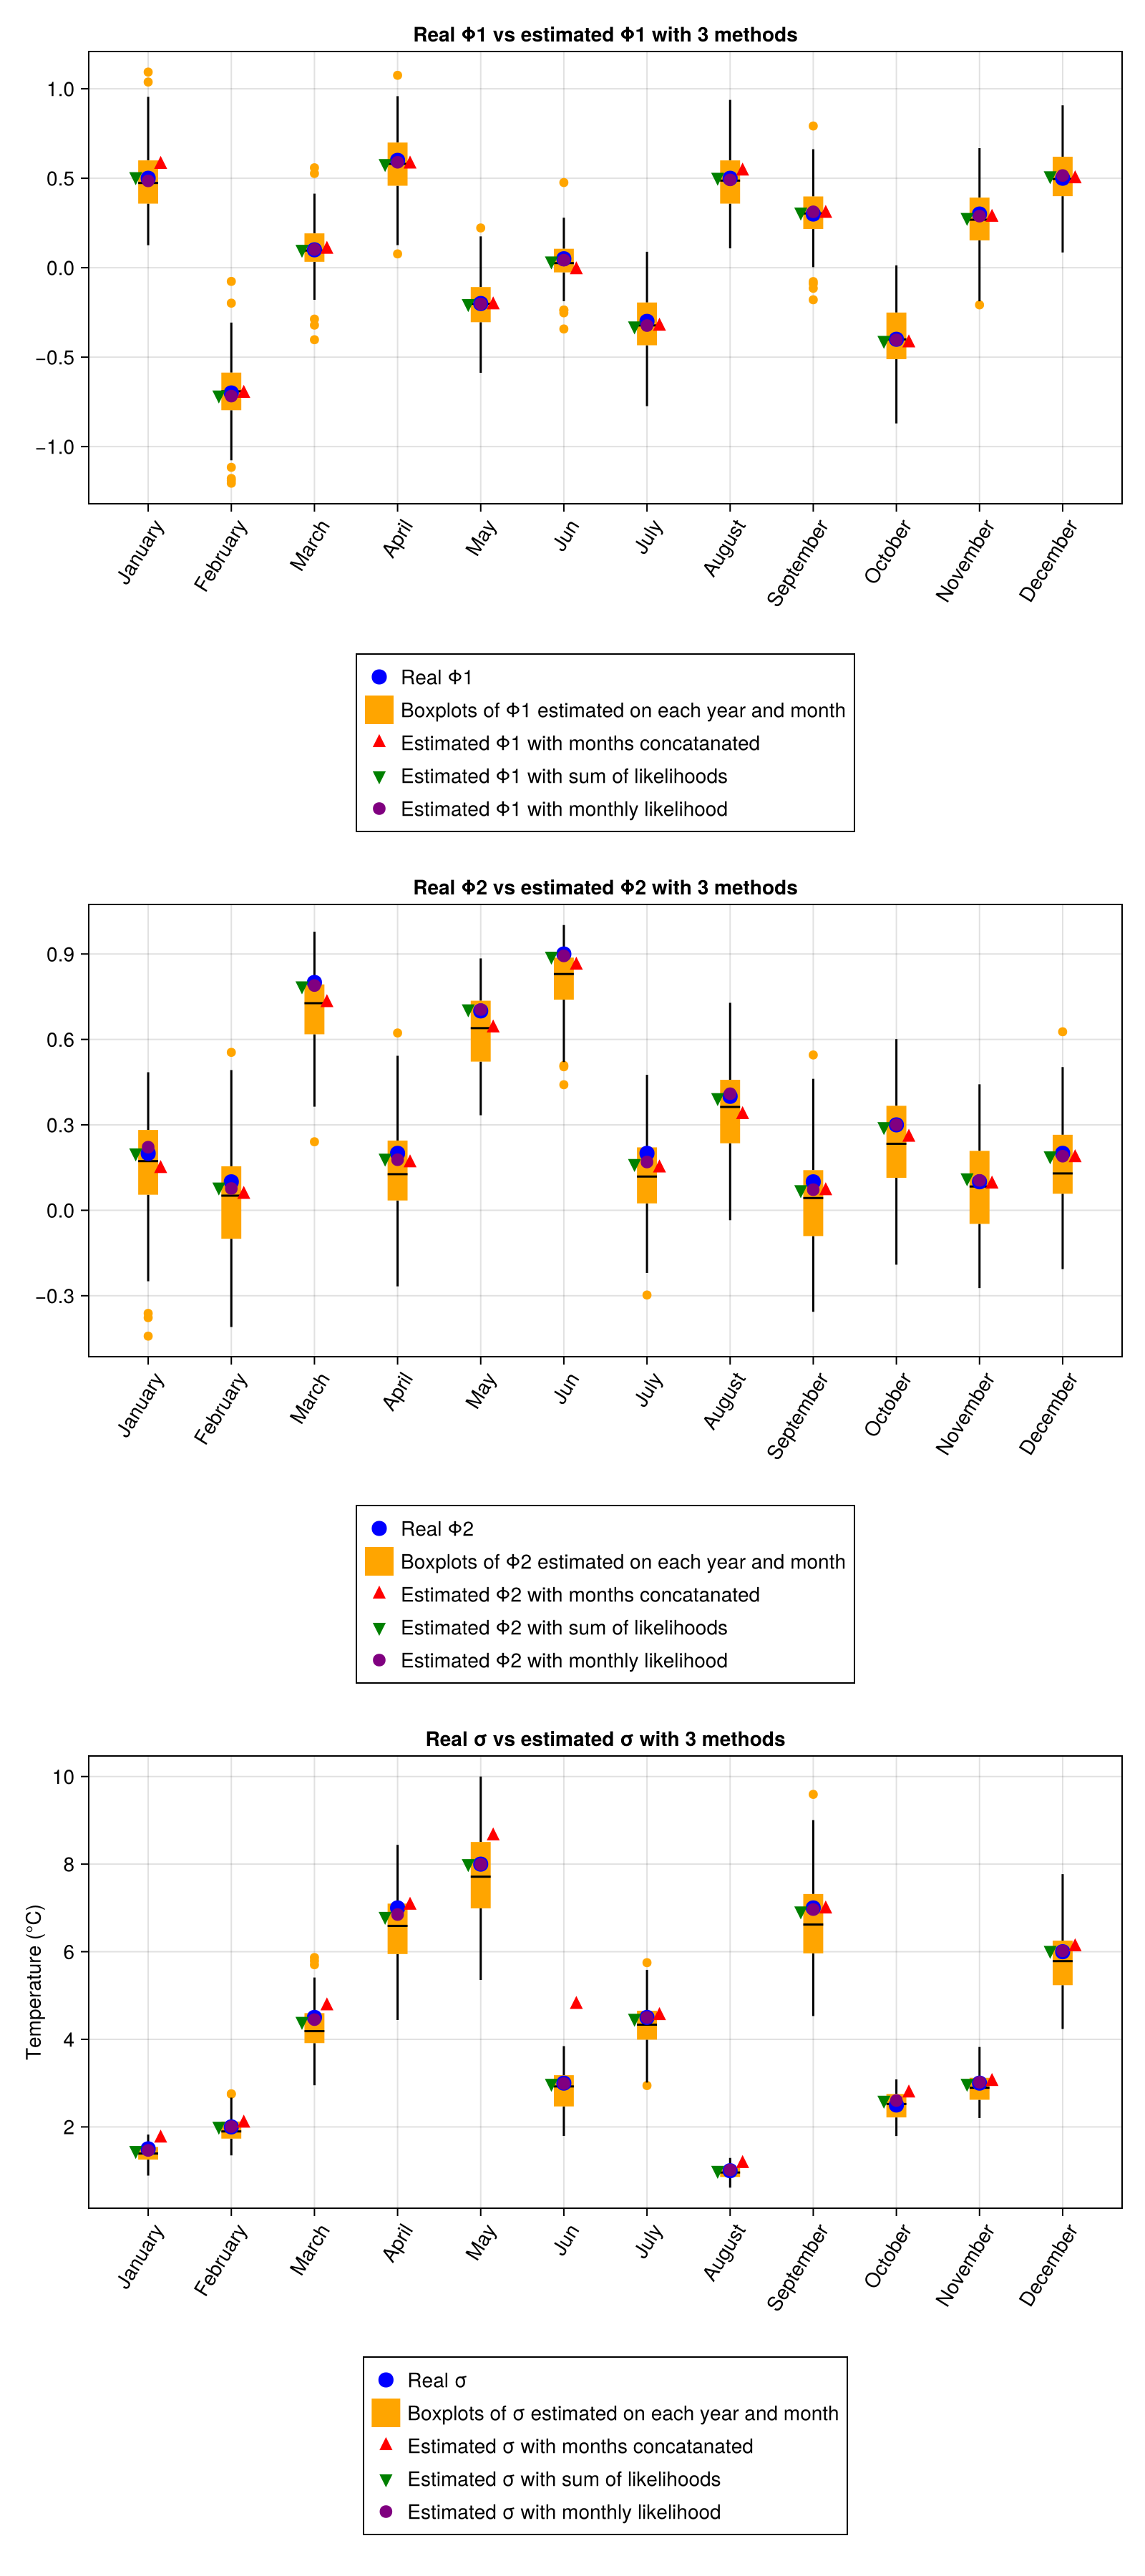

Row,Parameter,Month concatanation,Sum LL,Monthly LL,mean of monthly parameters,median of monthly parameters
,String,Float64,Float64,Float64,Float64,Float64
1,Φ1,15.0781,4.7094,3.96028,6.20538,7.20518
2,Φ2,17.948,8.04365,8.64135,26.4844,25.4492
3,σ,10.4776,1.30748,1.13979,4.21082,4.3752


7

In [9]:
include(raw"utils\Estimation.jl")
# Parameters,autofig=AllEstimation(x,2,Date_vec=Date_vec,TrueParamVec=[Φ1_month,Φ2_month,σ_month])

Parameters,autofig,ErrorTable=AllEstimation(x,2,Date_vec=Date_vec,TrueParamVec=[Φ1_month,Φ2_month,σ_month],ErrorTable=true)
display(autofig)
display(ErrorTable)

In [13]:
using Latexify

ErrorTable[:,2:end] = round.(ErrorTable[:,2:end]; digits=2)
latexify(ErrorTable; env = :table, booktabs = true, latex = false) |> print

\begin{tabular}{cccccc}
\toprule
Parameter & Month concatanation & Sum LL & Monthly LL & mean of monthly parameters & median of monthly parameters\\
\midrule
Φ1 & 15.08 & 4.71 & 3.96 & 6.21 & 7.21\\
Φ2 & 17.95 & 8.04 & 8.64 & 26.48 & 25.45\\
σ & 10.48 & 1.31 & 1.14 & 4.21 & 4.38\\
\bottomrule
\end{tabular}


In [32]:
Φ_vec, σ_vec = AutoTakeParameters((Parameters,ErrorTable))
n_years=10
sim=SimulateScenarios([4.,3.],Date(2001,1,1):(Date(2001,1,1) + Year(n_years-1)),Φ_vec, σ_vec,n=10)
sample_=GatherYearScenarios(sim,Date(2001,1,1):(Date(2001,1,1) + Year(n_years-1)))

UndefVarError: UndefVarError: `Parameters` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: Parameters is loaded but not imported in the active module Main.

In [33]:
include("utils/Plotting.jl")
PlotYearCurves([],
["Simulated temperatures quantile interval, p ∈ [0.1,0.9]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered, no periodicity)",
[(minimum.(sample_),maximum.(sample_)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
)

UndefVarError: UndefVarError: `sample_` not defined in `Main`
Suggestion: check for spelling errors or missing imports.